### In this notebook we will analyze Madrid's air quality in 2001-2018. The dataset used here can be found from [Kaggle](https://www.kaggle.com/decide-soluciones/air-quality-madrid). Follow the instructions in README.md how to load the data to the BigQuery. 

#### Here we have chosen the columns NO_2 and O_3 for our inspection, mainly because they have the most amount of non-null values in the dataset. We will start by making a query in order to have a suitable DataFrame for our purposes. If you look at the data more carefully you'll notice that there are lots of null values and hence average seems to be more suitable metric than, for instance, summing.

In [2]:
%%bq query -n monthlyaverages
SELECT EXTRACT(YEAR FROM date) as year, EXTRACT(MONTH FROM date) as month, AVG(NO_2) as average_NO2, AVG(O_3) as average_O3
FROM `madrid_pollution_dataset.madrid20*` WHERE NO_2 > 0 AND O_3 > 0
GROUP BY year, month
ORDER BY year ASC, month ASC

In [3]:
# We'll make a corresponding dataframe from the table.
monthlyaverages_df = monthlyaverages.execute().result().to_dataframe()

In [4]:
monthlyaverages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
year           209 non-null int64
month          209 non-null int64
average_NO2    209 non-null float64
average_O3     209 non-null float64
dtypes: float64(2), int64(2)
memory usage: 6.6 KB


In [5]:
monthlyaverages_df.head(20)

,year,month,average_NO2,average_O3
0,2001,1,57.059209,19.510678
1,2001,2,64.687358,20.526322
2,2001,3,49.467090,29.016779
3,2001,4,53.114233,40.435008
4,2001,5,64.071691,41.059053
5,2001,6,67.470436,46.036578
6,2001,7,61.667491,47.136723
7,2001,8,55.726541,47.087956
8,2001,9,65.255108,38.864413
9,2001,10,59.146116,22.178610


In [6]:
monthlyaverages_df.tail(20)

,year,month,average_NO2,average_O3
189,2016,10,47.482809,32.531898
190,2016,11,47.141026,24.240046
191,2016,12,53.788289,18.777135
192,2017,1,51.347225,25.879388
193,2017,2,40.896492,36.998709
194,2017,3,39.332174,48.520429
195,2017,4,29.362961,68.834689
196,2017,5,28.976015,66.888627
197,2017,6,29.625292,72.321381
198,2017,7,32.115009,64.605876


#### Our dataframe seems to be as we wanted. Let's update the library seaborn to its newest version just in case.

In [7]:
!conda update -y seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.10
  latest version: 4.5.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



#### Let us examine the monthly averages of NO_2 and O_3 from years 2001, 2009 and 2017.

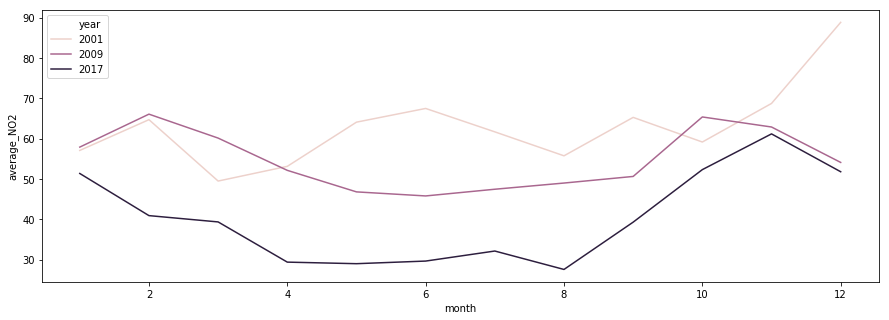

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='average_NO2', hue='year', legend="full",
data=monthlyaverages_df[(monthlyaverages_df.year==2001) | (monthlyaverages_df.year==2009) | (monthlyaverages_df.year==2017)])

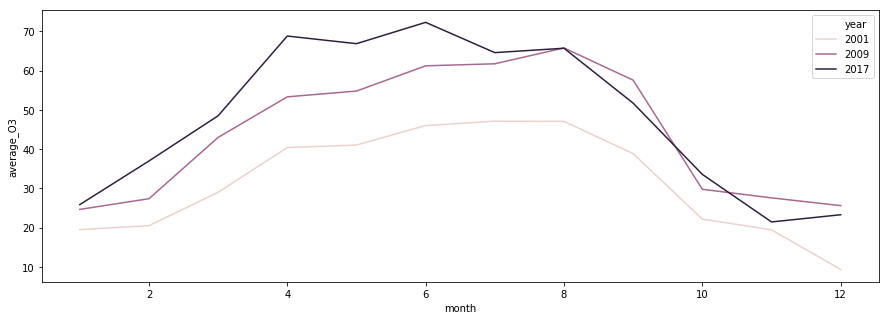

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='average_O3', hue='year', legend="full", 
data=monthlyaverages_df[(monthlyaverages_df.year==2001) | (monthlyaverages_df.year==2009) | (monthlyaverages_df.year==2017)])

#### The averages by month of the selected years seem to obey pretty much the same yearly trend, only levels differ year by year.

#### Let's take a look at the yearly averages through the whole timescale 2001-2018. 

In [36]:
%%bq query -n yearlyaverages
SELECT EXTRACT(YEAR FROM date) as year, AVG(NO_2) as avg_NO2, AVG(O_3) as avg_O3
FROM `madrid_pollution_dataset.madrid20*` WHERE NO_2 > 0 AND O_3 > 0
GROUP BY year
ORDER BY year ASC

In [37]:
yearlyaverages_df = yearlyaverages.execute().result().to_dataframe()

In [38]:
yearlyaverages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
year       18 non-null int64
avg_NO2    18 non-null float64
avg_O3     18 non-null float64
dtypes: float64(2), int64(1)
memory usage: 512.0 bytes


In [39]:
yearlyaverages_df.head(10)

,year,avg_NO2,avg_O3
0,2001,62.942008,31.557711
1,2002,61.662381,32.930193
2,2003,58.490062,36.910125
3,2004,60.923437,33.144040
4,2005,62.508801,34.635762
5,2006,61.263490,34.675375
6,2007,60.924553,34.450314
7,2008,55.878555,39.044208
8,2009,54.795150,44.710012
9,2010,41.893197,47.668850


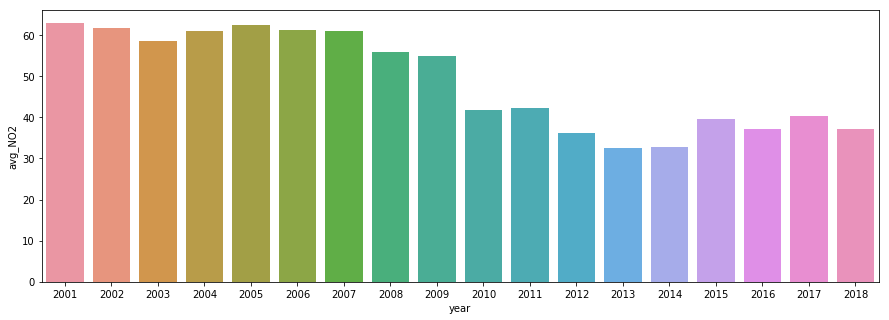

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x='year', y='avg_NO2', data=yearlyaverages_df)

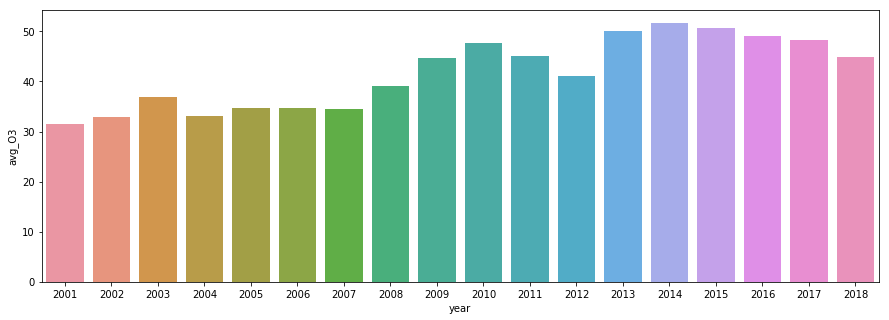

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='year', y='avg_O3', data=yearlyaverages_df)

#### These barcharts as well as the earlier visualizations clearly show that the NO_2 levels have been dropping and O_3 increasing. Unfortunately the schema of the data does not reveal whether the changes are significant or not. Better ask your climate expert friend about this!

#### The data for year 2018 covers only the beginning of the year so let's model the NO_2 and O_3 levels until the end of 2018. Maybe we will get soon the data so that we can compare the predictions to real values.